# Medical Reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn

## Reconstruction using ICP

### ICP implementation

Eh we'll do it later!

### ICP Testing

In [28]:
def randomTransformation2D(maxRot=30, maxTrans=1):
    theta = np.random.uniform(-maxRot, maxRot)
    gamma = np.random.uniform(0, maxTrans)
    
    trans_dir = np.random.uniform(-1, 1, (2, ))
    trans = gamma * trans_dir / np.linalg.norm(trans_dir)
    
    return np.array([
        [np.cos(theta), -np.sin(theta), trans[0]],
        [np.sin(theta),  np.cos(theta), trans[1]],
        [            0.,              0.,       1.]
    ])

def rotate2D(v, trans_mat):
    if v.shape[1] == 2:
        v = np.hstack((v, np.ones((v.shape[0], 1))))
        
    return v.dot(trans_mat)[:, :2]

In [83]:
def randomTransformation3D(maxRot=30, maxTrans=1):
    theta = np.random.uniform(-maxRot, maxRot)
    gamma = np.random.uniform(0, maxTrans)
    
    trans_dir = np.random.uniform(-1, 1, (3, ))
    trans = gamma * trans_dir / np.linalg.norm(trans_dir)
    
    R_x = np.array([
        [            1,                      0.,                      0.,                0.],
        [            0.,  np.cos(theta), -np.sin(theta),               0.],
        [            0.,  np.sin(theta),   np.cos(theta),              0.],
        [            0.,                    0.,                        0.,               1.]
    ])
    
    theta = np.random.uniform(-maxRot, maxRot)
    R_y = np.array([
        [  np.cos(theta),           0.,    np.sin(theta),               0.],
        [                      0.,           1.,                        0.,               0.],
        [ -np.sin(theta),           0.,    np.cos(theta),               0.],
        [                      0.,           0.,                        0.,               1.]
    ])

    theta = np.random.uniform(-maxRot, maxRot)
    R_z = np.array([
        [   np.cos(theta),   -np.sin(theta),         0.,               0.],
        [    np.sin(theta),   np.cos(theta),         0.,               0.],
        [                       0.,                        0.,         1.,               0.],
        [                       0.,                       0.,          0.,               1.]
    ])
    
    R = R_x.dot(R_y.dot(R_z))
    
    T = np.array([
        [np.cos(theta), -np.sin(theta), trans[0],              0],
        [np.sin(theta),  np.cos(theta), trans[1],              0],
        [np.sin(theta),  np.cos(theta), trans[1],              0],
        [            trans[0],              trans[1],       trans[2], 1.]
    ])
    
    return R

def rotate3D(v, trans_mat):
    if v.shape[1] == 3:
        v = np.hstack((v, np.ones((v.shape[0], 1))))
        
    return v.dot(trans_mat)[:, :3]

In [75]:
def gen_square(a=2, center=(0, 0), N=100):
    N_edge = N // 4
    square = [np.array([a * np.random.uniform(0, 1) - a / 2, a / 2]) for _ in range(N_edge)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, - a / 2]) for _ in range(N_edge)] \
        + [np.array([a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_edge)] \
        + [np.array([- a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_edge)]
        
    return np.array(square)

def gen_cube(a=2, center=(0, 0), N=100):
    N_face = N // 6
    
    cube = [np.array([a / 2, a * np.random.uniform(0, 1) - a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_face)] \
        + [np.array([-a / 2, a * np.random.uniform(0, 1) - a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_face)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_face)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, -a / 2, a * np.random.uniform(0, 1) - a / 2]) for _ in range(N_face)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, a * np.random.uniform(0, 1) - a / 2, a / 2]) for _ in range(N_face)] \
        + [np.array([a * np.random.uniform(0, 1) - a / 2, a * np.random.uniform(0, 1) - a / 2, -a / 2]) for _ in range(N_face)] \

    return np.array(cube)

In [65]:
square = gen_square(a = 10, N = 400)

random_transform = randomTransformation2D()
rot_square = rotate2D(square, random_transform)

<IPython.core.display.Javascript object>


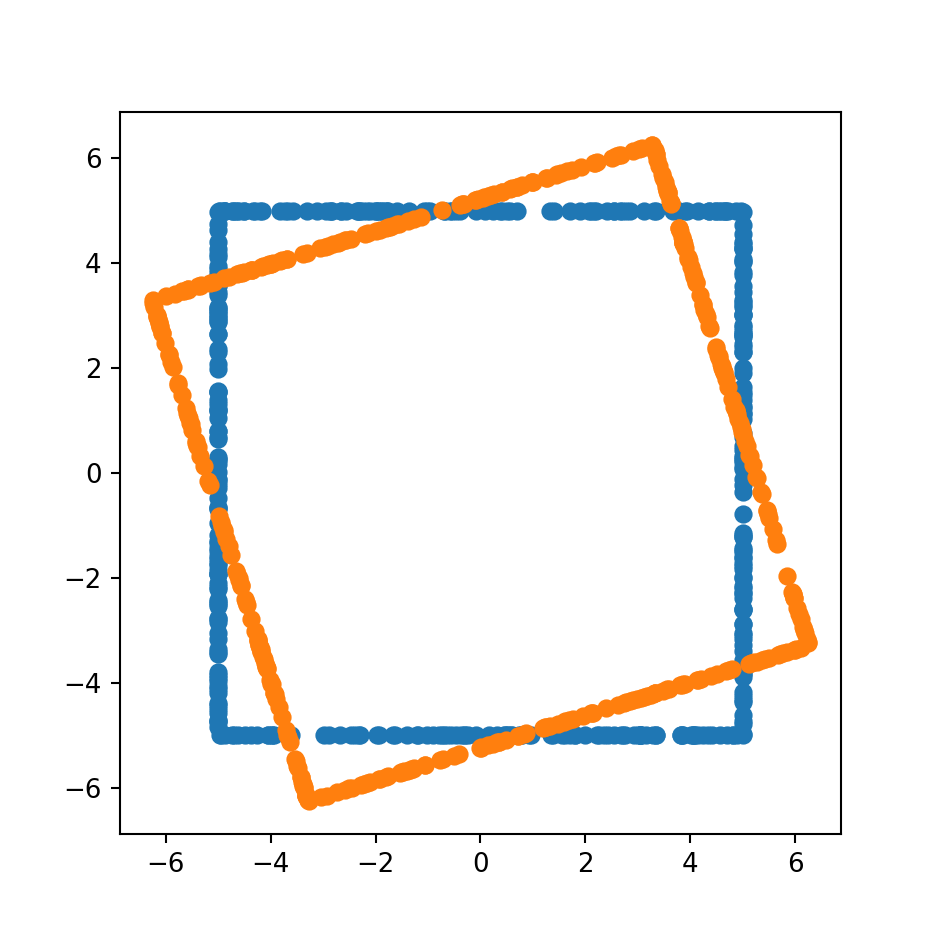

In [67]:
plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(square[:, 0], square[:, 1])
plt.scatter(rot_square[:, 0], rot_square[:, 1])

In [68]:
from icp import icp

T, dist, num_iterations = icp(square, rot_square, max_iterations=50)
num_iterations

19

<IPython.core.display.Javascript object>


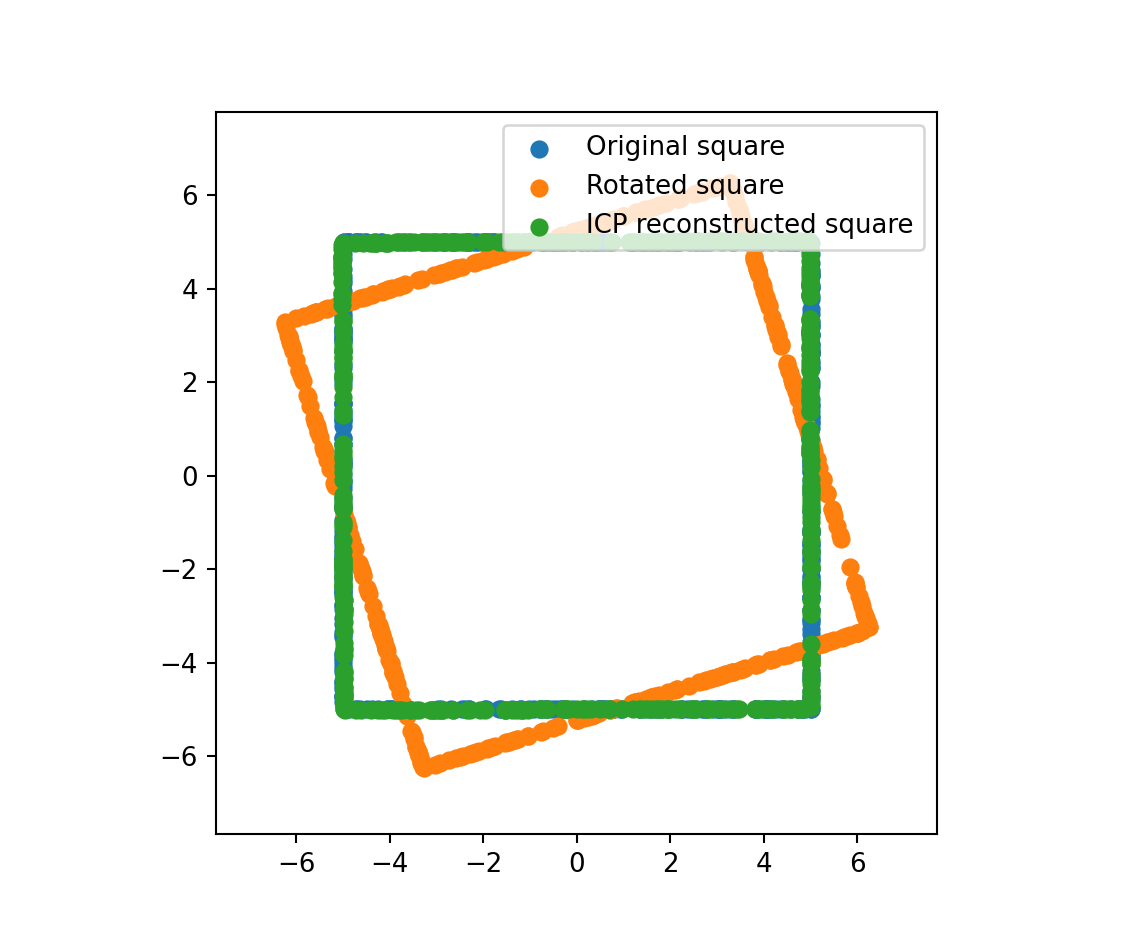

In [71]:
plt.figure(figsize=(6, 5))
plt.gca().set_aspect('equal', adjustable='box')

icp_square = rotate2D(rot_square, T)

plt.scatter(square[:, 0], square[:, 1], label='Original square')
plt.scatter(rot_square[:, 0], rot_square[:, 1], label='Rotated square')
plt.scatter(icp_square[:, 0], icp_square[:, 1], label='ICP reconstructed square')

plt.legend(loc='upper right')

In [93]:
cube = gen_cube(N=500)

random_transform = randomTransformation3D()
rot_cube = rotate3D(cube, random_transform)

<IPython.core.display.Javascript object>


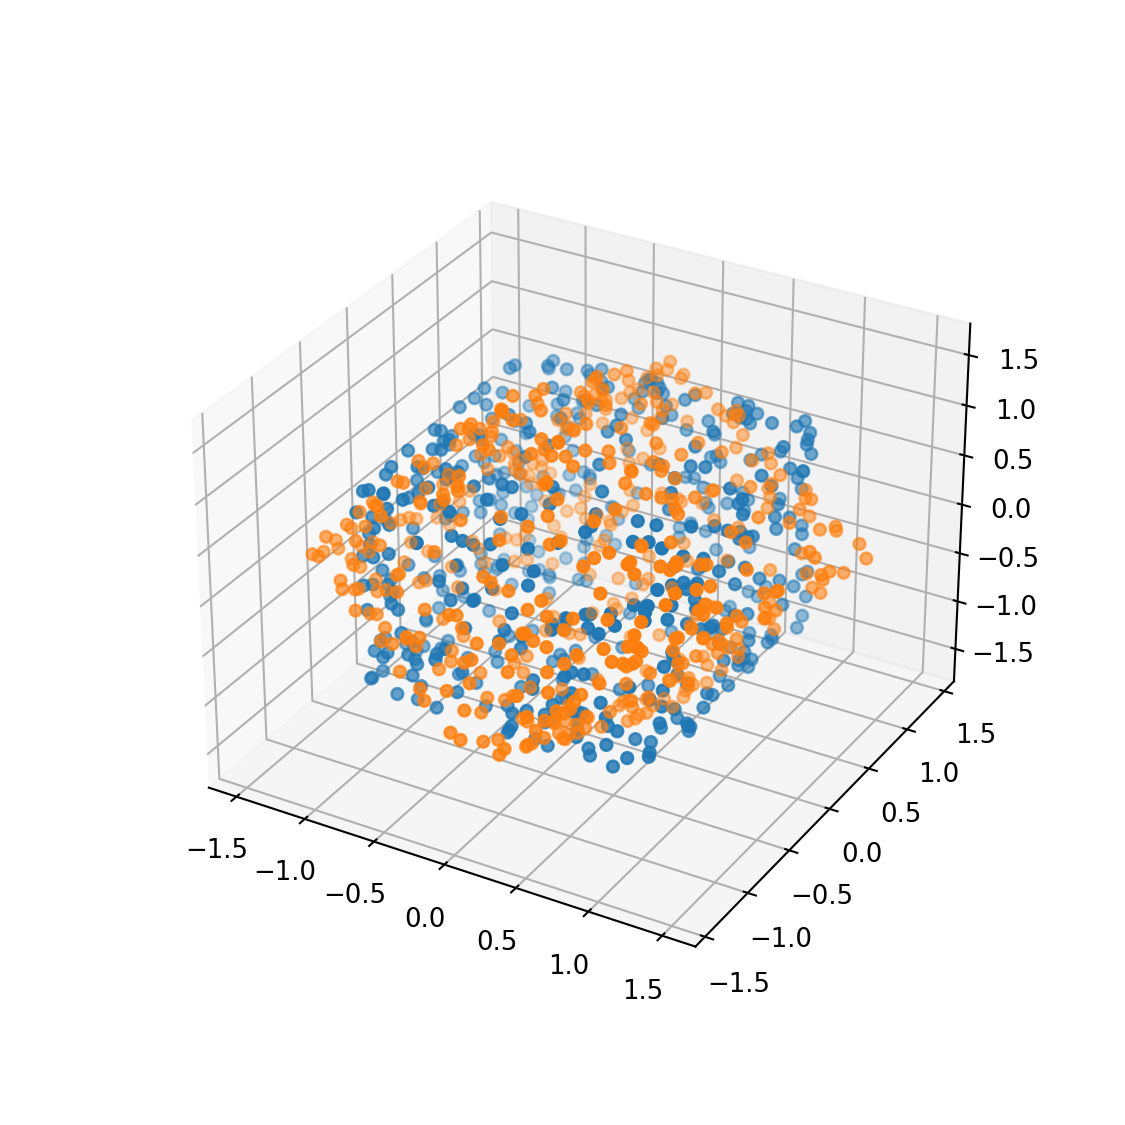

In [94]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

ax.scatter3D(cube[:, 0], cube[:, 1], cube[:, 2])
ax.scatter3D(rot_cube[:, 0], rot_cube[:, 1], rot_cube[:, 2])

In [87]:
T, dist, num_iterations = icp(cube, rot_cube, max_iterations=50)
num_iterations

18

<IPython.core.display.Javascript object>


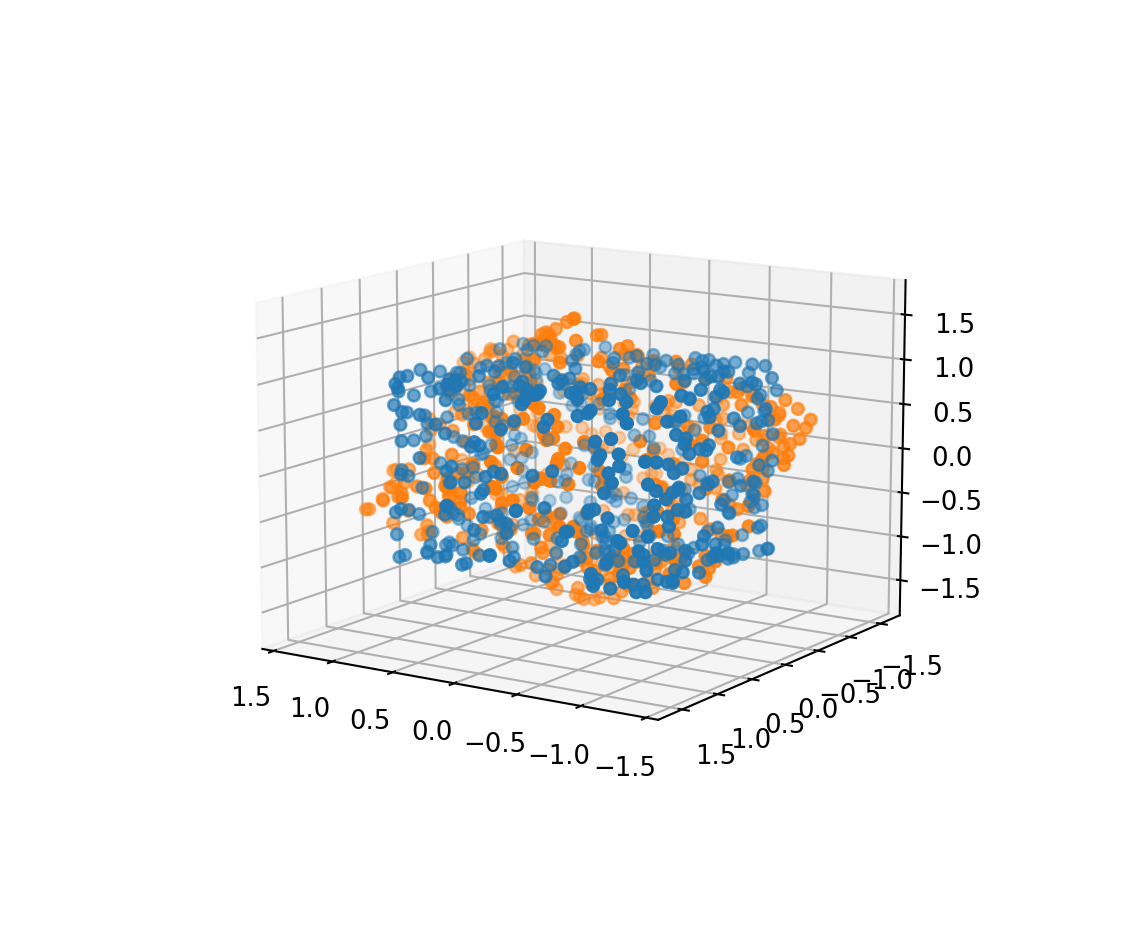

/home/mattrouss/EPITA/ING3/IMED2/medical_icp/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
plt.figure(figsize=(6, 5))
plt.gca().set_aspect('equal', adjustable='box')
ax = plt.axes(projection='3d')

icp_cube = rotate3D(rot_cube, T)

ax.scatter3D(cube[:, 0], cube[:, 1], cube[:, 2])
ax.scatter3D(icp_cube[:, 0], icp_cube[:, 1], icp_cube[:, 2])

## Eye vessel segmentation

In [2]:
import skimage
from skimage import io

In [176]:
# Performance measurement utilies

def dice_score(seg, gt):
    return np.sum(seg[gt == 255])*2.0 / (np.sum(seg) + np.sum(gt))

In [181]:
# Image utilities
def load_vessel_seg_mask(vessel_number):
    vessel_path = f'data/images/{vessel_number:02d}_dr.JPG'
    gt_path = f'data/manual1/{vessel_number:02d}_dr.tif'
    mask_path = f'data/mask/{vessel_number:02d}_dr_mask.tif'
    
    vessel = skimage.io.imread(vessel_path, as_gray=True)
    gt = skimage.io.imread(gt_path, as_gray=True)
    mask = skimage.io.imread(mask_path, as_gray=True)
    
    assert vessel.shape == gt.shape and gt.shape == mask.shape
    
    return vessel, gt, mask

def rescale_image(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    
    return (255 * rescaled).astype(np.uint8)

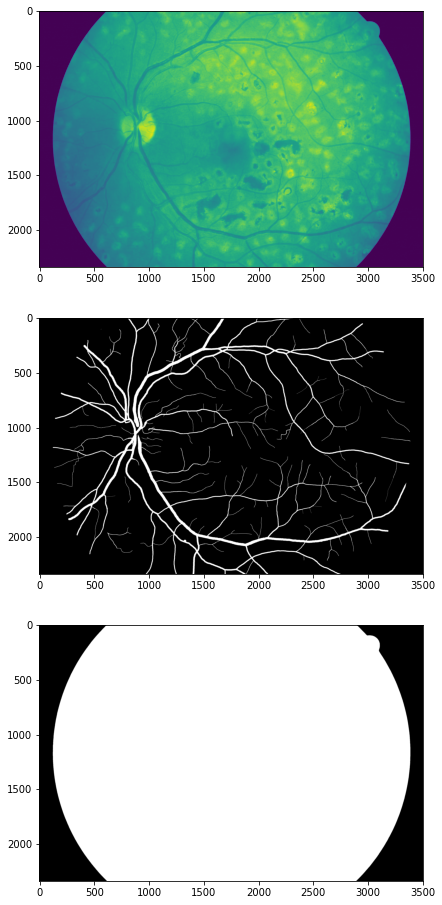

In [182]:
vessel, gt, mask = load_vessel_seg_mask(3)
plt.figure(figsize=(16, 16))
plt.subplot(311)
plt.imshow(vessel)
plt.subplot(312)
plt.imshow(gt, cmap='gray')
plt.subplot(313)
plt.imshow(mask, cmap='gray')

### Frangi implementation

Might do that later as well

In [225]:
from skimage.filters import threshold_otsu, frangi
from skimage.morphology import remove_small_objects

def segment_vessel(vessel, mask):
    frang = frangi(vessel, sigmas=np.arange(1, 10, 2), alpha=1, beta=0.5, gamma=5)
    frang[mask == 0] = 0
    
    frang = rescale_image(frang)
   
    otsu = threshold_otsu(frang)
    frang = remove_small_objects(frang > otsu, min_size=400)
    frang = 255 * (frang).astype(np.uint8)
    
    return frang

In [226]:
seg = segment_vessel(vessel, mask)

print(dice_score(seg, gt))

0.3752334671127706


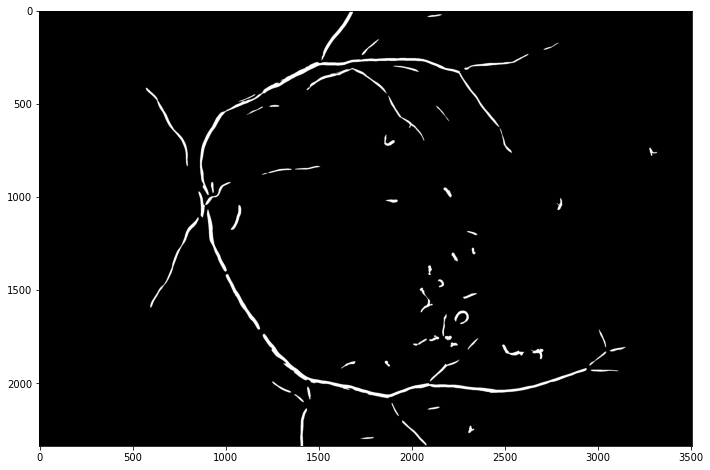

In [227]:
plt.figure(figsize=(16, 8))
plt.imshow(seg, cmap='gray')

### Central line segmentation 

In [231]:
from skimage.morphology import skeletonize

skel = skeletonize(gt // 255)

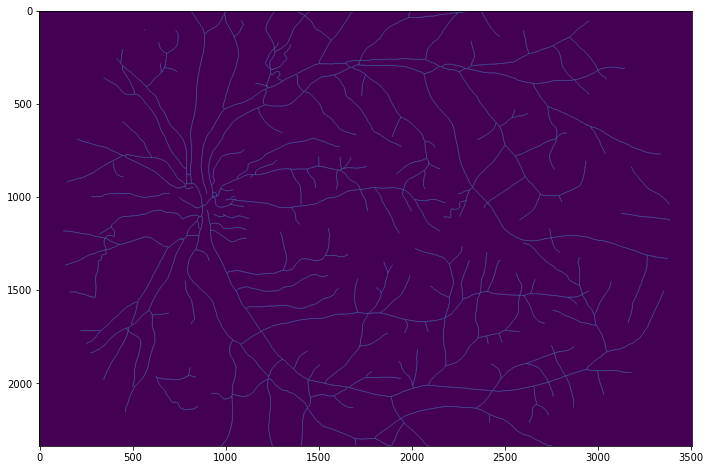

In [232]:
plt.figure(figsize=(16, 8))
plt.imshow(skel)

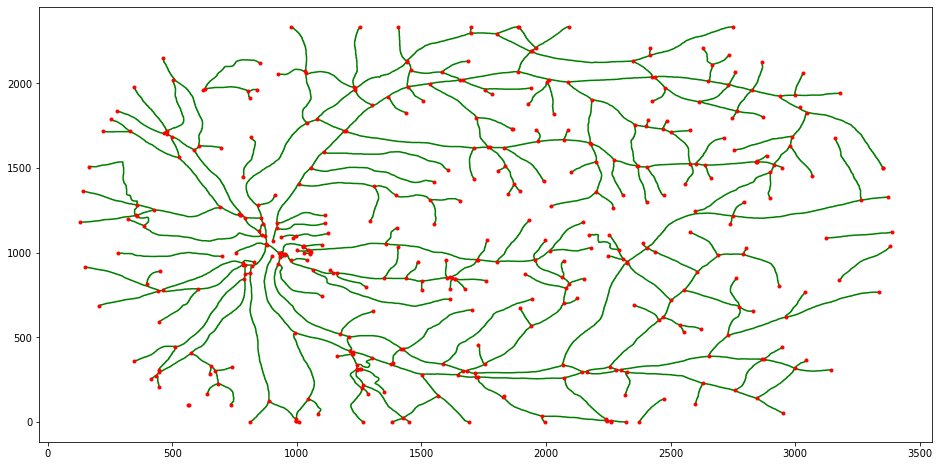

In [236]:
import sknw

plt.figure(figsize=(16, 8))
# build graph from skeleton
graph = sknw.build_sknw(skel)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

plt.show()